## Gradient Descent for Optimisation

Gradient descent is a gradient-based optimization algorithm that is used extensively in machine learning and deep learning to minimize a loss function by iteratively adjusting the model parameters in the direction of steepest descent based on the negative gradient. Specifically, we will look at how to fit a straight line through a set of points to determine the slope of the line. To do this, we will define a loss function that quantifies the error between the data and the mathematical model we choose to represent the data, and we will use this loss function to develop an update rule that will iteratively converge to the optimal value. We will conclude the notebook with a variation on the Gradient Descent algorithm called Mini-Batch Stochastic Gradient Descent which is the basis for training neural networks.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
block_plot = False

In [3]:
# Constants used for defining the data.
NUM_DATA = 30
SEED_VALUE = 42

# Constant for plotting loss.
MAX_LOSS = 30.0

# Constants used for finding the best `m` value.
LEARNING_RATE = 0.005
NUM_ITERATIONS = 50
M_DEFAULT_VALUE = 2

In [4]:
def createData():
    # Random manual seed for consistency.
    tf.random.set_seed(SEED_VALUE)

    # Create some data that is roughly linear.
    x = 10 * tf.random.uniform(shape=[NUM_DATA])
    y = x + tf.random.normal(shape=[NUM_DATA], stddev=0.3)

    return x, y

In [ ]:
def plotLinearModel(x, y, m, title, xLim=(0, 10), yLim=(0, 10)):
    xMin = tf.reduce_min(x)
    xMax = tf.reduce_max(x)

    xPlot = np.linspace(xMin, xMax, 2)
    yPlot = m * xPlot

    plt.figure()
    plt.xlim(xLim)
    plt.ylim(yLim)
    plt.plot(xPlot, yPlot, "c--")
    plt.scatter(x, y, color="green", s=20)
    plt.xlabel("X")
    plt.ylabel("Y")

    if title is not None:
        plt.title(title)

    yMin = tf.reduce_min(y)
    yMax = tf.reduce_max(y)

    xc = 0.05 * (xMax - xMin)
    yc = 0.95 * (yMax - yMin)
    plt.text(xc, yc, "Slope: " + str(int(m * 1000) / 1000), fontsize=14)

In [ ]:
def plotLossModel(loss, xLim, yLim, title):
    plt.figure()
    plt.xlim(xLim)
    plt.ylim(yLim)
    plt.plot(loss.numpy())
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(title)

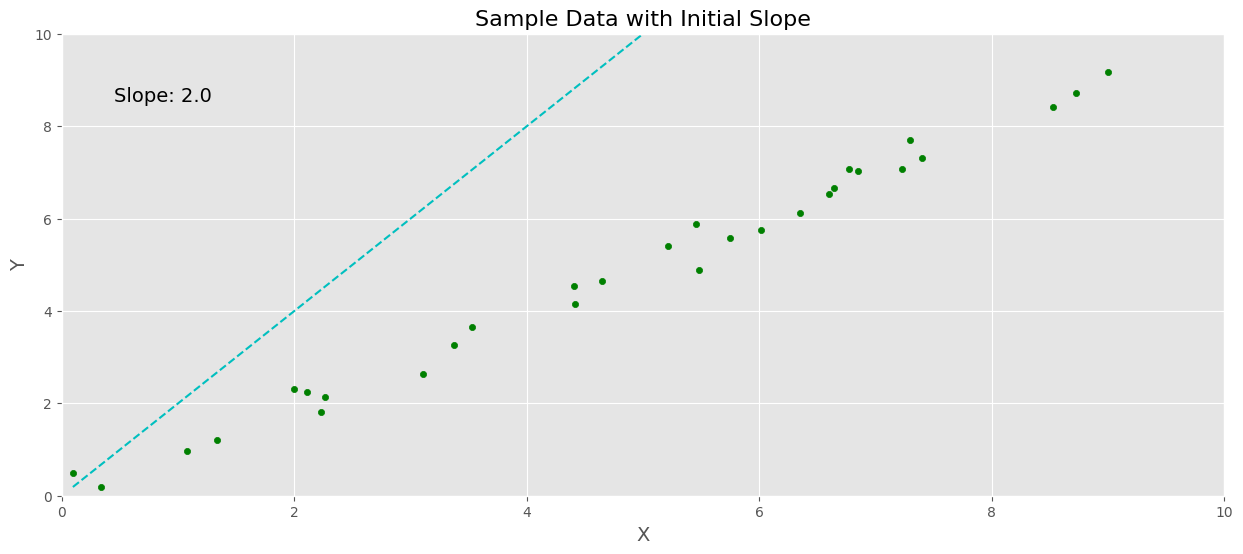

In [ ]:
x, y = createData()
plotLinearModel(x, y, M_DEFAULT_VALUE, "Sample Data with Initial Slope")

In [ ]:
def bruteForceSearch():
    minValue = 0.0
    maxValue = 2.0

    # Number of steps between min and max values
    numSteps = 50
    stepSize = (maxValue - minValue) / (numSteps - 1)

    # Space to store all values of `m` and the `loss` corresponding to each `m`
    m = tf.Variable(tf.zeros(shape=[numSteps]))
    loss = tf.Variable(tf.zeros(shape=[numSteps]))

    for i in range(0, numSteps):
        m[i].assign(minValue + i * stepSize)
        e = y - m[i] * x
        loss[i].assign(tf.reduce_sum(tf.multiply(e, e)) / len(x))

    # Index of lossest loss.
    minIndex = tf.argmin(loss)

    print("Brute Force Search")
    print("Loss: ", loss[minIndex])
    print("Slope: ", m[minIndex])
    # Plot loss vs m.
    plt.figure
    plt.plot(m.numpy(), loss.numpy(), "c-")
    plt.xlabel("m")
    plt.ylabel("Loss")
    plt.title("Brute Force Search")
    plt.show(block=block_plot)

### Gradint Descent

The `loss` plot from the Brute Force section shows that we can start from an initial guess of `m`, 
and follow the slope of the curve downward to reach the bottom of the curve. 
To automate this process, for a given value of `m` we can compute the gradient 
of the loss function and use that value to inform us how to adjust `m`. 
If the gradient is positive, then lower the value of `m` to move closer to the minimum, 
and if the gradient is negative, raise the value of `m`. 
This simple idea is called Gradient Descent.

To follow the slope of the curve toward the minimum, we need to move `m` in the 
direction of the negative gradient. However, we need to control the rate at which 
we move along the curve so that we do not overshoot the minimum. 
So we use a parameter, `λ`, called the learning rate. This is a parameter that 
requires tuning depending on the problem at hand. When working with larger, 
more complex problems, it can be tricky to set the learning rate appropriately.

In [ ]:
def gradientDescent(
    numIterations=NUM_ITERATIONS, learningRate=LEARNING_RATE, m=M_DEFAULT_VALUE
):
    loss = tf.Variable(tf.zeros(shape=[numIterations]))

    xLen = len(x)
    for i in range(0, numIterations):
        gradient = -2 * tf.reduce_sum(tf.multiply(x, y - m * x)) / xLen
        m = m - learningRate * gradient

        e = y - m * x
        loss[i].assign(tf.reduce_sum(tf.multiply(e, e)) / xLen)

    print("Gradient Descent")
    print("Min Loss: ", loss[-1].numpy)
    print("Slope: ", m.numpy)

    plotLinearModel(x, y, m, title="Gradient Descent")
    plotLossModel(
        loss, title="Gradient Descent", xLim=(0, numIterations), yLim=(0, MAX_LOSS)
    )

### Stochastic Gradient Descent
In the real world, calculating the gradient based on all data points can be computationally expensive.
Fortunately, using all the data points for computing the gradient is unnecessary.
Stochastic Gradient Descent is an updated algorithm which uses a single randonly 
choosen data point to compute the gradient at each iteration.
Even though the gradient at each step is not as accurate, the idea still works.
The convergence might be slower using this technique because the gradient is not as accurate.

In [ ]:
def stochasticGradientDescent(
    numIterations=NUM_ITERATIONS, learningRate=LEARNING_RATE, m=M_DEFAULT_VALUE
):
    loss = tf.Variable(tf.zeros(shape=[numIterations]))

    xLen = len(x)
    yLen = len(y)
    for i in range(0, numIterations):
        k = tf.random.uniform([1], minval=0, maxval=yLen, dtype=tf.int32)

        gradient = -2 * tf.gather(x, k) * (tf.gather(y, k) - m * tf.gather(x, k))
        m = m - learningRate * gradient

        e = y - m * x
        loss[i].assign(tf.reduce_sum(e * e))

    print("Stochastic Gradient Descent")
    print("Min Loss: ", loss[-1].numpy)
    print("Slope: ", m.numpy)

    plotLinearModel(x, y, m, title="Stochastic Gradient Descent")
    plotLossModel(
        loss,
        title="Stochastic Gradient Descent",
        xLim=(0, numIterations),
        yLim=(0, MAX_LOSS),
    )

### Stochastic Gradient Descent with Mini-Batch
Using more than one data point for the gradient calculation has two advantages:
 - Using multiple data points produces a more accurate estimate for the gradient.
 - GPUs are highly efficient at processing gradient computations.
So, we get better results and faster convergence if we use a small batch of data points, 
called a mini-batch, to compute the gradients.
A "mini-batch" approach strikes a nice balance between using all the data points vs just a single data point.

In [ ]:
def SGD_miniBatch(
    numIterations=NUM_ITERATIONS,
    learningRate=LEARNING_RATE,
    m=M_DEFAULT_VALUE,
    batchSize=10,
):
    loss = tf.Variable(tf.zeros(shape=[numIterations]))

    xLen = len(x)
    yLen = len(y)
    for i in range(0, numIterations):
        k = tf.random.uniform([batchSize], minval=0, maxval=yLen, dtype=tf.dtypes.int32)

        gradient = (
            -2
            * tf.reduce_sum(tf.gather(x, k) * (tf.gather(y, k) - m * tf.gather(x, k)))
            / batchSize
        )
        m = m - learningRate * gradient

        e = y - m * x
        loss[i].assign(tf.reduce_sum(e * e) / batchSize)

    print("SGD Mini Batch")
    print("Min Loss: ", loss[-1].numpy)
    print("Slope: ", m.numpy)

    plotLinearModel(x, y, m, title="SGD Mini Batch")
    plotLossModel(
        loss, title="SGD Mini Batch", xLim=(0, numIterations), yLim=(0, MAX_LOSS)
    )

Brute Force Search
Loss:  tf.Tensor(0.07493041, shape=(), dtype=float32)
Slope:  tf.Tensor(0.97959185, shape=(), dtype=float32)


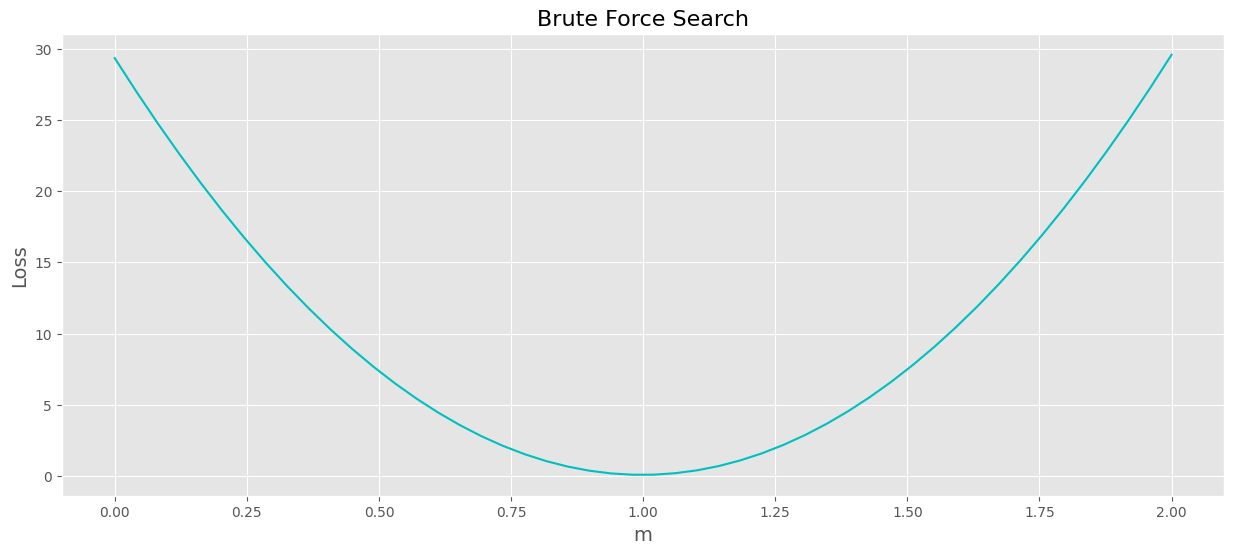

Gradient Descent
Min Loss:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.06500982493162155>>
Slope:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.9979585409164429>>
Stochastic Gradient Descent
Min Loss:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.961415410041809>>
Slope:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.0015088], dtype=float32)>>
SGD Mini Batch
Min Loss:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.19664259254932404>>
Slope:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0022344589233398>>


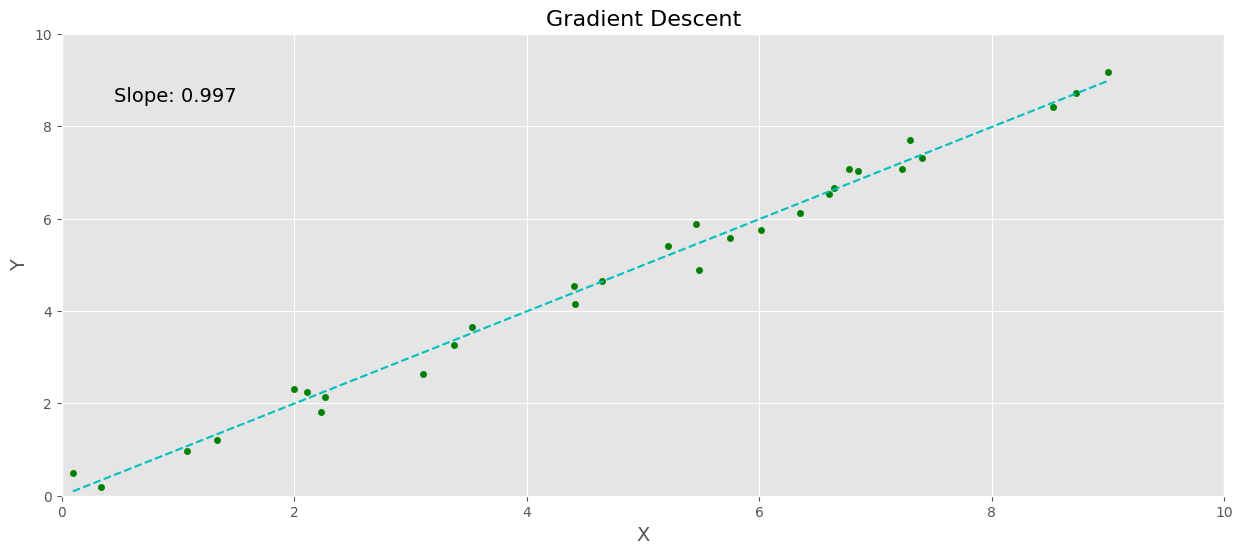

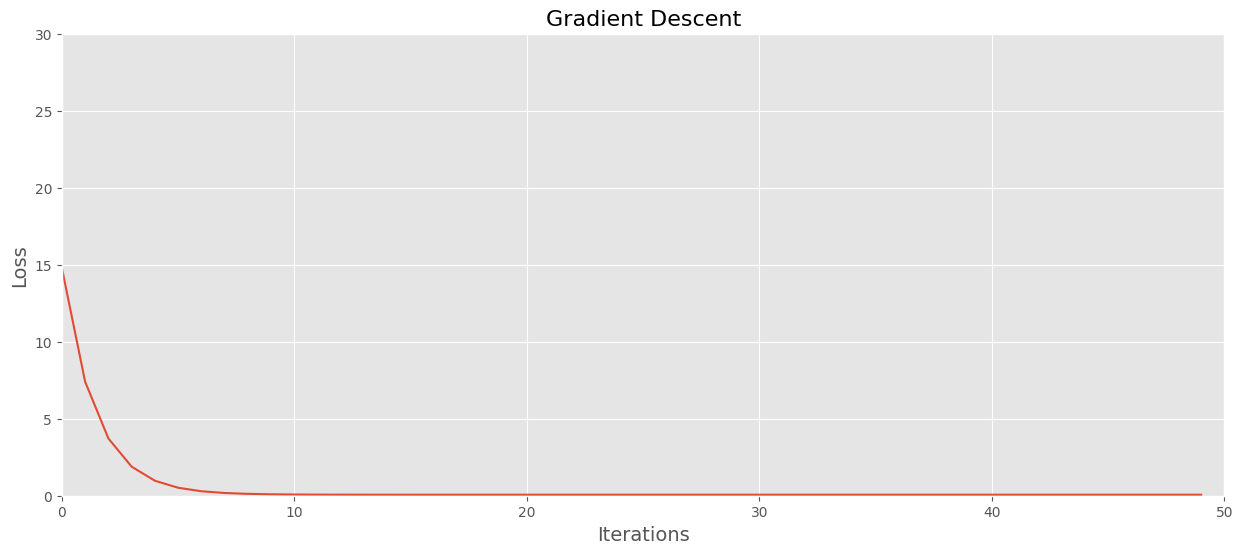

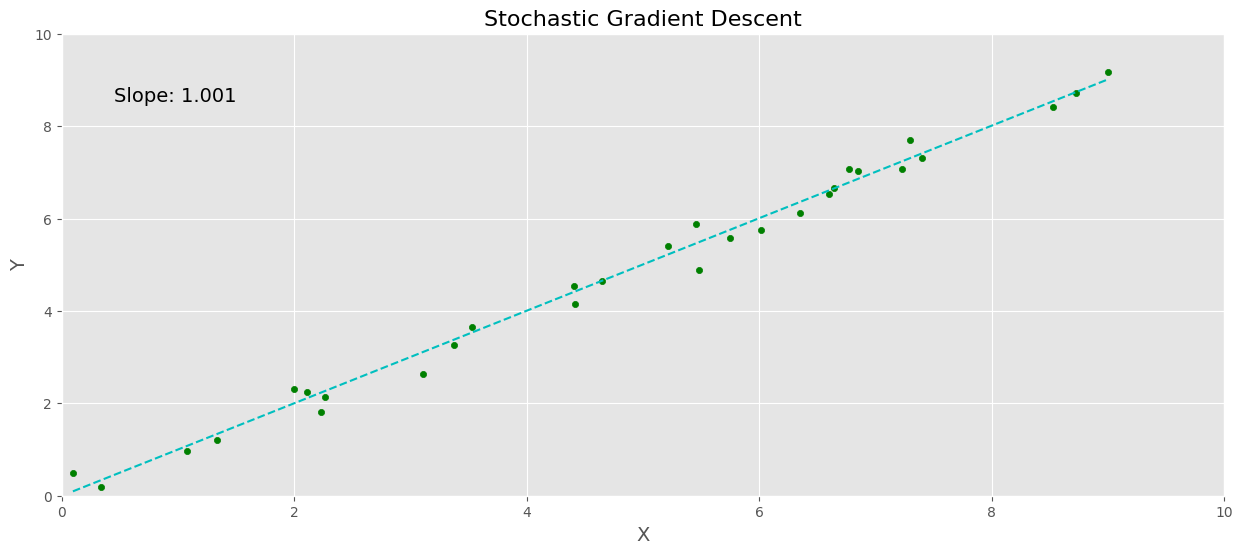

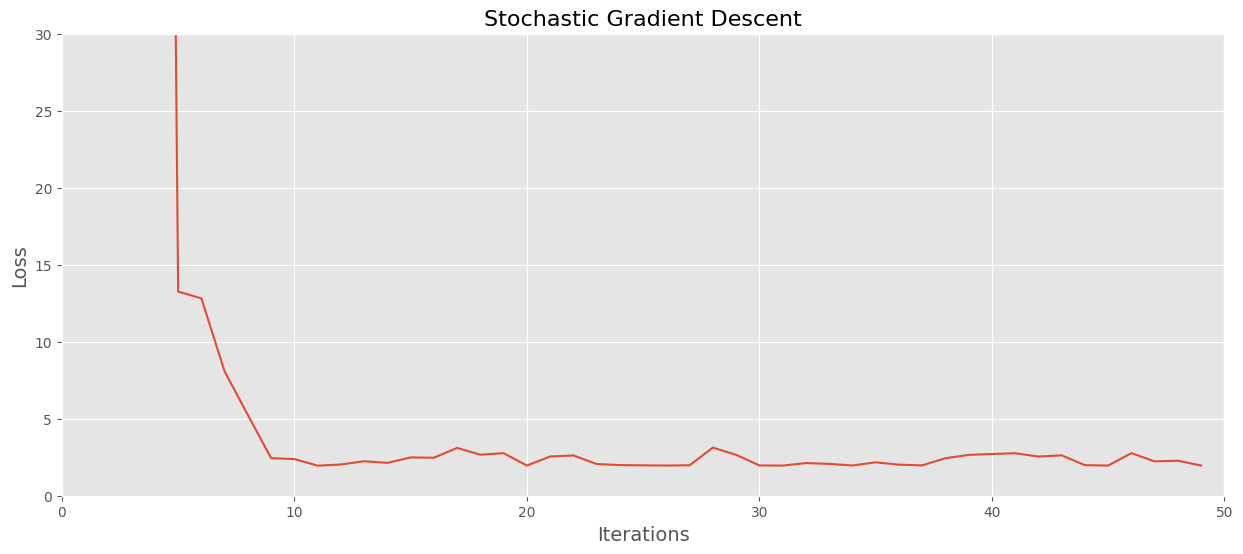

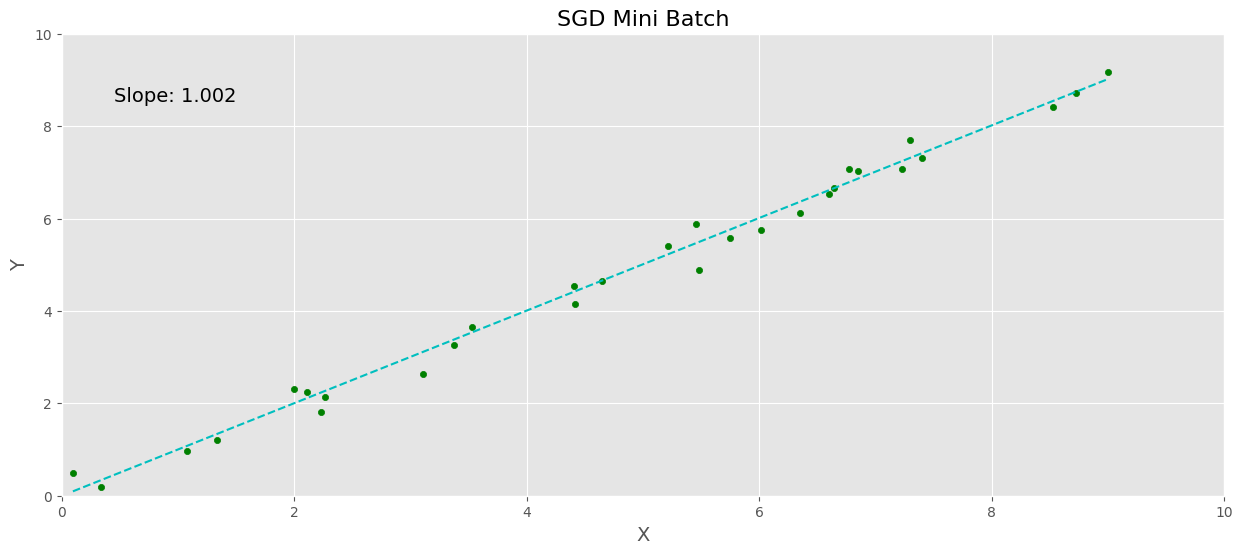

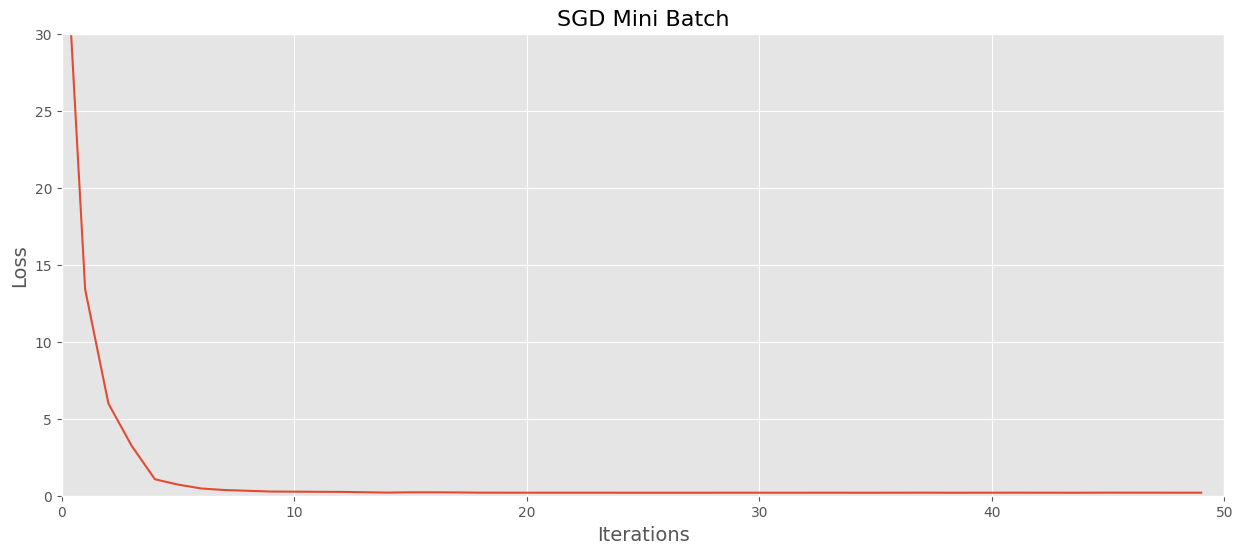

In [17]:
bruteForceSearch()

gradientDescent()

stochasticGradientDescent()

SGD_miniBatch()